In [3]:
# Import Python packages that will come in handy...

import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import xarray as xr
from wrf import getvar, interplevel
from glob import glob
from IPython.display import Image
import cartopy.crs as ccrs
from scipy.spatial import cKDTree
import cartopy.io.shapereader as shpreader
from mpl_toolkits.basemap import Basemap
%matplotlib inline

/glade/u/apps/ch/opt/pythonpkgs/2.7/xarray/0.9.5/intel/16.0.3/lib/python2.7/site-packages/xarray/core/formatting.py:16: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


In [4]:
path = "/glade2/work/jpiers/WRFV3/run/" # set path to where WRF output files are located
wrf_files = sorted(glob(path+"wrfout*")) # define wrf_files, sorted by time

# print(wrf_files) # if we print it, we see them all listed with their paths

In [6]:
ds_12_nc = Dataset(wrf_files[12])

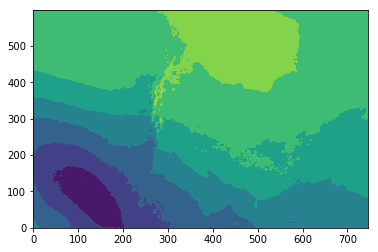

In [7]:
temperature_celsius = getvar(ds_12_nc, "temp", units="degC")
pressure = getvar(ds_12_nc, "p", units="mb")
temp_500mb = interplevel(temperature_celsius, pressure, 500)

plt.contourf(temp_500mb)

In [9]:
pw = getvar(ds_12_nc, "pw")
pressure = getvar(ds_12_nc, "p", units="mb")
pw_500mb = interplevel(pw, pressure, 500)

plt.contourf(pw_500mb)

ValueError: invalid shape for argument 0 (got (599, 747), expected (747,))

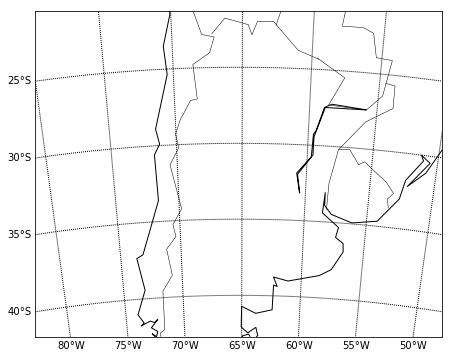

In [7]:
# create a figure!!

fig = plt.figure(figsize=(10, 6)) # define fig to set the size

bmap = Basemap(projection="lcc", lon_0=-65.25, lat_0=-32.0, lat_1=-32, lat_2=-32, 
               llcrnrlon=ds_12_nc["XLONG"][0, 0, 0], llcrnrlat=ds_12_nc["XLAT"][0, 0, 0], 
               urcrnrlon=ds_12_nc["XLONG"][0, -1, -1], urcrnrlat=ds_12_nc["XLAT"][0, -1, -1]) # This won't change much

# add important lines
bmap.drawcoastlines()
bmap.drawcountries()

meridians = np.arange(-80, -30, 5)
parallels = np.arange(-40, -20, 5)
bmap.drawmeridians(meridians, labels=[0,0,0,1])
bmap.drawparallels(parallels, labels=[1,0,0,0])

